# Ride-Sharing Revenue Prediction Project
## Notebook 01: Initial Data Exploration

**Project Goal:** Build a comprehensive revenue prediction model for ride-sharing bookings and provide actionable business insights.

**This Notebook Covers:**
1. Dataset loading and initial inspection
2. Data structure and types analysis
3. Missing values assessment
4. Basic statistical summaries
5. Initial data quality findings

**Author:** Victor Gomes  
**Date:** January 2025

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully!
Pandas version: 3.0.0
NumPy version: 2.3.5


In [4]:
# Load the dataset
data_path = "../data/raw/ncr_ride_bookings.csv"

print("Loading dataset...")
df = pd.read_csv(data_path)

print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading dataset...
✓ Dataset loaded successfully!
Dataset shape: 150,000 rows × 21 columns


---
## 1. Dataset Structure & Overview
Understanding the basic structure, dimensions, and column information of our dataset.

In [5]:
# Display first few rows
print("=" * 80)
print("FIRST 5 ROWS OF THE DATASET")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("LAST 5 ROWS OF THE DATASET")
print("=" * 80)
display(df.tail())

FIRST 5 ROWS OF THE DATASET


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.90,14.00,NaN,NaN,NaN,NaN,1.00,Vehicle Breakdown,237.00,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.40,25.80,NaN,NaN,NaN,NaN,NaN,NaN,627.00,13.58,4.90,4.90,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.10,28.50,NaN,NaN,NaN,NaN,NaN,NaN,416.00,34.02,4.60,5.00,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.30,19.60,NaN,NaN,NaN,NaN,NaN,NaN,737.00,48.21,4.10,4.30,UPI



LAST 5 ROWS OF THE DATASET


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.20,44.40,NaN,NaN,NaN,NaN,NaN,NaN,475.00,40.08,3.70,4.10,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.10,30.80,NaN,NaN,NaN,NaN,NaN,NaN,1093.00,21.31,4.80,5.00,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.70,23.40,NaN,NaN,NaN,NaN,NaN,NaN,852.00,15.93,3.90,4.40,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.90,39.60,NaN,NaN,NaN,NaN,NaN,NaN,333.00,45.54,4.10,3.70,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.50,33.70,NaN,NaN,NaN,NaN,NaN,NaN,806.00,21.19,4.60,4.90,Credit Card


In [6]:
# Display dataset information
print("=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
print(f"\nTotal Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "-" * 80)
print("COLUMN DETAILS")
print("-" * 80)
df.info()

DATASET INFORMATION

Total Records: 150,000
Total Features: 21
Memory Usage: 100.71 MB

--------------------------------------------------------------------------------
COLUMN DETAILS
--------------------------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  str    
 1   Time                               150000 non-null  str    
 2   Booking ID                         150000 non-null  str    
 3   Booking Status                     150000 non-null  str    
 4   Customer ID                        150000 non-null  str    
 5   Vehicle Type                       150000 non-null  str    
 6   Pickup Location                    150000 non-null  str    
 7   Drop Location                      150000 non

In [7]:
# Create a summary of column names and data types
column_summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

print("=" * 80)
print("COLUMN SUMMARY")
print("=" * 80)
display(column_summary)

COLUMN SUMMARY


,Column,Data Type,Non-Null Count,Null Count,Null Percentage
0,Date,str,150000,0,0.00
1,Time,str,150000,0,0.00
2,Booking ID,str,150000,0,0.00
3,Booking Status,str,150000,0,0.00
4,Customer ID,str,150000,0,0.00
5,Vehicle Type,str,150000,0,0.00
6,Pickup Location,str,150000,0,0.00
7,Drop Location,str,150000,0,0.00
8,Avg VTAT,float64,139500,10500,7.00
9,Avg CTAT,float64,102000,48000,32.00


---
## 2. Data Types Analysis
Identifying and documenting the data types for proper preprocessing.

In [8]:
# Analyze data types distribution
print("=" * 80)
print("DATA TYPES DISTRIBUTION")
print("=" * 80)

dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

# Categorize columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   • {col}")

print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}")

DATA TYPES DISTRIBUTION
str        12
float64     9
Name: count, dtype: int64

📊 Numerical Columns (9):
   • Avg VTAT
   • Avg CTAT
   • Cancelled Rides by Customer
   • Cancelled Rides by Driver
   • Incomplete Rides
   • Booking Value
   • Ride Distance
   • Driver Ratings
   • Customer Rating

📝 Categorical Columns (12):
   • Date
   • Time
   • Booking ID
   • Booking Status
   • Customer ID
   • Vehicle Type
   • Pickup Location
   • Drop Location
   • Reason for cancelling by Customer
   • Driver Cancellation Reason
   • Incomplete Rides Reason
   • Payment Method


---
## 3. Missing Values Analysis
Comprehensive assessment of missing data patterns and their potential impact.

In [9]:
# Calculate missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Display only columns with missing values
missing_data_filtered = missing_data[missing_data['Missing_Count'] > 0]

if len(missing_data_filtered) > 0:
    print(f"\n⚠️  Found {len(missing_data_filtered)} columns with missing values:\n")
    display(missing_data_filtered)
else:
    print("\n✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

MISSING VALUES ANALYSIS

⚠️  Found 13 columns with missing values:



,Column,Missing_Count,Missing_Percentage,Data_Type
15,Incomplete Rides Reason,141000,94.00,str
14,Incomplete Rides,141000,94.00,float64
10,Cancelled Rides by Customer,139500,93.00,float64
11,Reason for cancelling by Customer,139500,93.00,str
13,Driver Cancellation Reason,123000,82.00,str
12,Cancelled Rides by Driver,123000,82.00,float64
19,Customer Rating,57000,38.00,float64
18,Driver Ratings,57000,38.00,float64
17,Ride Distance,48000,32.00,float64
16,Booking Value,48000,32.00,float64



Total missing values: 1,123,500
Percentage of missing data: 35.67%


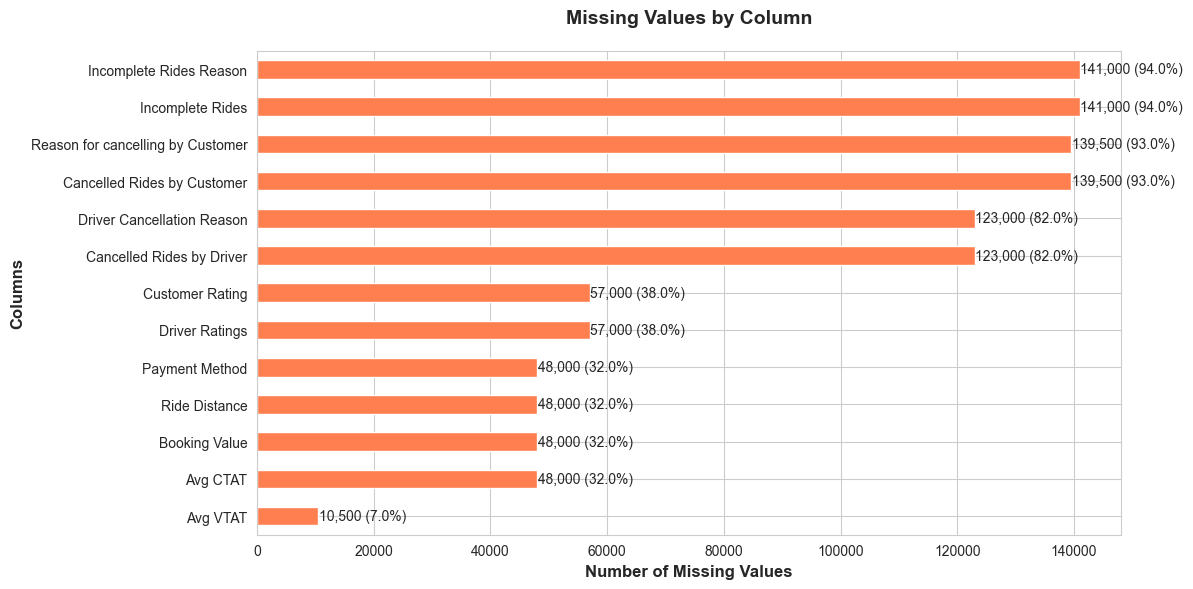

In [10]:
# Visualize missing values pattern
if df.isnull().sum().sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=True)
    
    missing_counts.plot(kind='barh', color='coral', ax=ax)
    ax.set_xlabel('Number of Missing Values', fontsize=12, fontweight='bold')
    ax.set_ylabel('Columns', fontsize=12, fontweight='bold')
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold', pad=20)
    
    # Add value labels
    for i, v in enumerate(missing_counts.values):
        ax.text(v + 100, i, f'{v:,} ({v/len(df)*100:.1f}%)', 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("✓ No visualization needed - dataset is complete!")

---
## 4. Duplicate Records Check
Identifying potential duplicate entries in the dataset.

In [11]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)

duplicate_rows = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_rows:,}")
print(f"Percentage of duplicates: {(duplicate_rows / len(df) * 100):.2f}%")

# Check for duplicate Booking IDs
if 'Booking ID' in df.columns:
    duplicate_bookings = df['Booking ID'].duplicated().sum()
    print(f"\nDuplicate Booking IDs: {duplicate_bookings:,}")
    
    if duplicate_bookings > 0:
        print("\n⚠️  Warning: Duplicate Booking IDs found!")
        print("Sample duplicate Booking IDs:")
        duplicated_ids = df[df['Booking ID'].duplicated(keep=False)]['Booking ID'].unique()[:5]
        for booking_id in duplicated_ids:
            print(f"   • {booking_id}")
    else:
        print("✓ All Booking IDs are unique!")

DUPLICATE RECORDS ANALYSIS

Total duplicate rows: 0
Percentage of duplicates: 0.00%

Duplicate Booking IDs: 1,233

⚠️  Warning: Duplicate Booking IDs found!
Sample duplicate Booking IDs:
   • "CNR2687237"
   • "CNR5380412"
   • "CNR5071968"
   • "CNR2290384"
   • "CNR3466923"


---
## 5. Date Range Analysis
Understanding the temporal coverage of our dataset.

In [12]:
# Analyze date range
print("=" * 80)
print("DATE RANGE ANALYSIS")
print("=" * 80)

if 'Date' in df.columns:
    # Convert to datetime (will do proper conversion in cleaning notebook)
    try:
        df['Date_parsed'] = pd.to_datetime(df['Date'], errors='coerce')
        
        min_date = df['Date_parsed'].min()
        max_date = df['Date_parsed'].max()
        date_range = (max_date - min_date).days
        
        print(f"\n📅 Date Range:")
        print(f"   Start Date: {min_date.strftime('%Y-%m-%d')}")
        print(f"   End Date: {max_date.strftime('%Y-%m-%d')}")
        print(f"   Total Days: {date_range:,} days")
        print(f"   Total Months: {date_range / 30:.1f} months")
        
        # Check for missing dates
        missing_dates = df['Date_parsed'].isnull().sum()
        if missing_dates > 0:
            print(f"\n⚠️  Warning: {missing_dates:,} records with invalid dates")
        
        # Drop temporary column
        df.drop('Date_parsed', axis=1, inplace=True)
        
    except Exception as e:
        print(f"\n⚠️  Error parsing dates: {e}")
        print("Date format needs investigation during data cleaning phase.")
else:
    print("\n⚠️  'Date' column not found in dataset")

DATE RANGE ANALYSIS

📅 Date Range:
   Start Date: 2024-01-01
   End Date: 2024-12-30
   Total Days: 364 days
   Total Months: 12.1 months


---
## 6. Basic Statistical Summary
Descriptive statistics for numerical features.

In [13]:
# Statistical summary for numerical columns
print("=" * 80)
print("NUMERICAL FEATURES - STATISTICAL SUMMARY")
print("=" * 80)

numerical_summary = df[numerical_cols].describe().T
numerical_summary['range'] = numerical_summary['max'] - numerical_summary['min']
numerical_summary['variance'] = df[numerical_cols].var()

display(numerical_summary)

NUMERICAL FEATURES - STATISTICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max,range,variance
Avg VTAT,139500.00,8.46,3.77,2.00,5.30,8.30,11.30,20.00,18.00,14.24
Avg CTAT,102000.00,29.15,8.90,10.00,21.60,28.80,36.80,45.00,35.00,79.26
Cancelled Rides by Customer,10500.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
Cancelled Rides by Driver,27000.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
Incomplete Rides,9000.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
Booking Value,102000.00,508.30,395.81,50.00,234.00,414.00,689.00,4277.00,4227.00,156662.21
Ride Distance,102000.00,24.64,14.00,1.00,12.46,23.72,36.82,50.00,49.00,196.06
Driver Ratings,93000.00,4.23,0.44,3.00,4.10,4.30,4.60,5.00,2.00,0.19
Customer Rating,93000.00,4.40,0.44,3.00,4.20,4.50,4.80,5.00,2.00,0.19


In [14]:
# Focus on revenue (Booking Value)
if 'Booking Value' in df.columns:
    print("\n" + "=" * 80)
    print("REVENUE (BOOKING VALUE) - DETAILED STATISTICS")
    print("=" * 80)
    
    revenue = df['Booking Value'].dropna()
    
    print(f"\nTotal Bookings: {len(revenue):,}")
    print(f"Total Revenue: ₹{revenue.sum():,.2f}")
    print(f"Average Revenue: ₹{revenue.mean():,.2f}")
    print(f"Median Revenue: ₹{revenue.median():,.2f}")
    print(f"Std Deviation: ₹{revenue.std():,.2f}")
    
    print(f"\nRevenue Range:")
    print(f"   Minimum: ₹{revenue.min():,.2f}")
    print(f"   Maximum: ₹{revenue.max():,.2f}")
    print(f"   Range: ₹{(revenue.max() - revenue.min()):,.2f}")
    
    print(f"\nPercentiles:")
    for percentile in [10, 25, 50, 75, 90, 95, 99]:
        value = revenue.quantile(percentile/100)
        print(f"   {percentile}th percentile: ₹{value:,.2f}")
    
    # Check for zero or negative values
    zero_values = (revenue == 0).sum()
    negative_values = (revenue < 0).sum()
    
    print(f"\nData Quality:")
    print(f"   Zero revenue bookings: {zero_values:,}")
    print(f"   Negative revenue bookings: {negative_values:,}")


REVENUE (BOOKING VALUE) - DETAILED STATISTICS

Total Bookings: 102,000
Total Revenue: ₹51,846,183.00
Average Revenue: ₹508.30
Median Revenue: ₹414.00
Std Deviation: ₹395.81

Revenue Range:
   Minimum: ₹50.00
   Maximum: ₹4,277.00
   Range: ₹4,227.00

Percentiles:
   10th percentile: ₹127.00
   25th percentile: ₹234.00
   50th percentile: ₹414.00
   75th percentile: ₹689.00
   90th percentile: ₹958.00
   95th percentile: ₹1,224.00
   99th percentile: ₹1,963.01

Data Quality:
   Zero revenue bookings: 0
   Negative revenue bookings: 0


✓ Visualization saved: visualizations/01_revenue_distribution.png


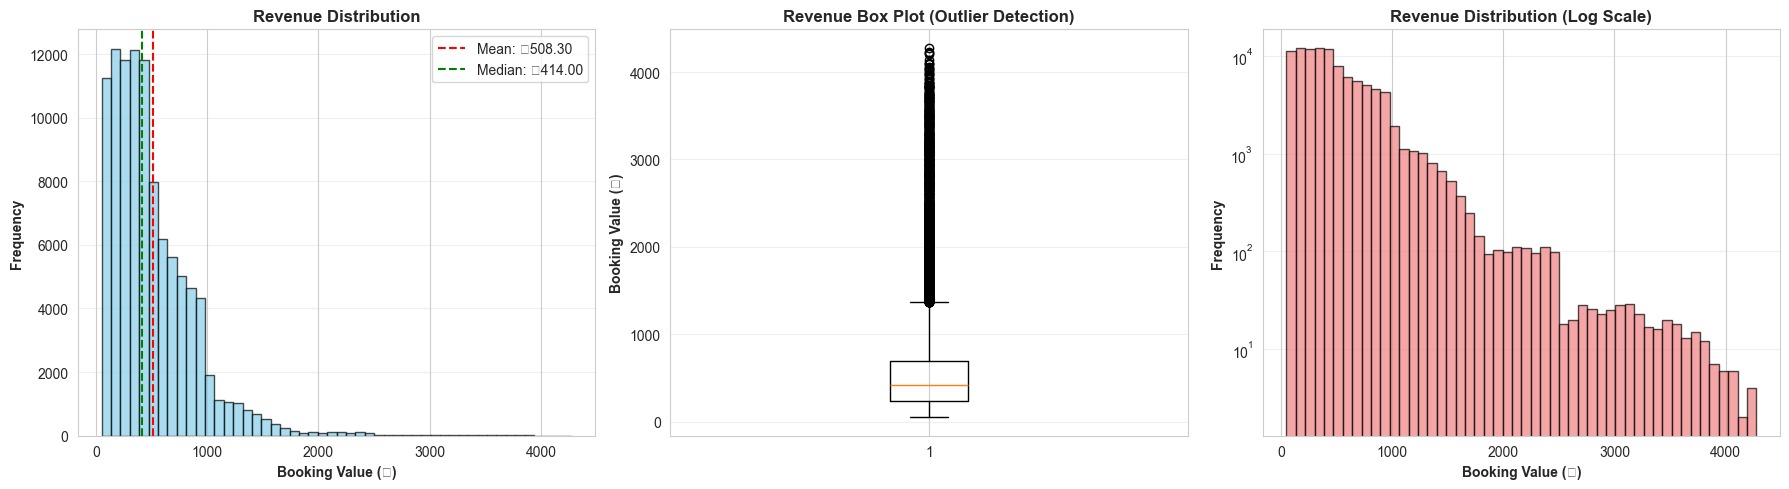

In [15]:
# Visualize revenue distribution
if 'Booking Value' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    revenue = df['Booking Value'].dropna()
    
    # Histogram
    axes[0].hist(revenue, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Booking Value (₹)', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    axes[0].set_title('Revenue Distribution', fontweight='bold', fontsize=12)
    axes[0].axvline(revenue.mean(), color='red', linestyle='--', label=f'Mean: ₹{revenue.mean():.2f}')
    axes[0].axvline(revenue.median(), color='green', linestyle='--', label=f'Median: ₹{revenue.median():.2f}')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Box plot
    axes[1].boxplot(revenue, vert=True)
    axes[1].set_ylabel('Booking Value (₹)', fontweight='bold')
    axes[1].set_title('Revenue Box Plot (Outlier Detection)', fontweight='bold', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Log scale histogram (if revenue has wide range)
    axes[2].hist(revenue, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[2].set_xlabel('Booking Value (₹)', fontweight='bold')
    axes[2].set_ylabel('Frequency', fontweight='bold')
    axes[2].set_title('Revenue Distribution (Log Scale)', fontweight='bold', fontsize=12)
    axes[2].set_yscale('log')
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../visualizations/01_revenue_distribution.png', dpi=300, bbox_inches='tight')
    print("✓ Visualization saved: visualizations/01_revenue_distribution.png")
    plt.show()

---
## 7. Categorical Features Analysis
Understanding the distribution of categorical variables.

In [16]:
# Analyze categorical features
print("=" * 80)
print("CATEGORICAL FEATURES - UNIQUE VALUES")
print("=" * 80)

categorical_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Values': [df[col].nunique() for col in categorical_cols],
    'Most_Common': [df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A' for col in categorical_cols],
    'Most_Common_Freq': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols],
    'Most_Common_Pct': [(df[col].value_counts().iloc[0] / len(df) * 100) if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols]
})

display(categorical_summary)

CATEGORICAL FEATURES - UNIQUE VALUES


,Column,Unique_Values,Most_Common,Most_Common_Freq,Most_Common_Pct
0,Date,365,2024-11-16,462,0.31
1,Time,62910,17:44:57,16,0.01
2,Booking ID,148767,"""CNR2726142""",3,0.00
3,Booking Status,5,Completed,93000,62.00
4,Customer ID,148788,"""CID4523979""",3,0.00
5,Vehicle Type,7,Auto,37419,24.95
6,Pickup Location,176,Khandsa,949,0.63
7,Drop Location,176,Ashram,936,0.62
8,Reason for cancelling by Customer,5,Wrong Address,2362,1.57
9,Driver Cancellation Reason,4,Customer related issue,6837,4.56



BOOKING STATUS DISTRIBUTION


,Count,Percentage
Booking Status,,
Completed,93000,62.00
Cancelled by Driver,27000,18.00
No Driver Found,10500,7.00
Cancelled by Customer,10500,7.00
Incomplete,9000,6.00



✓ Visualization saved: visualizations/01_booking_status.png


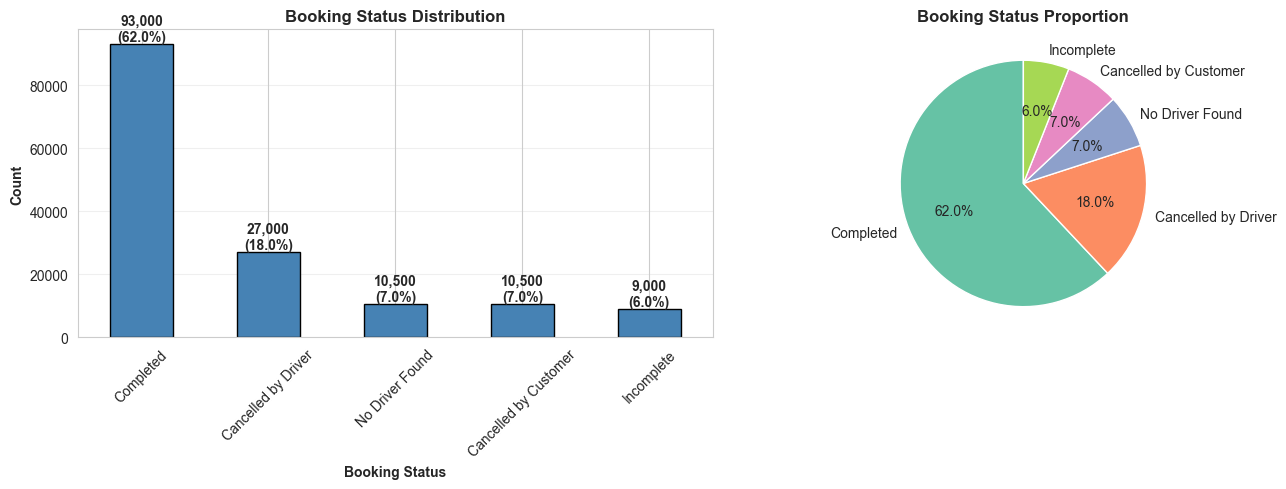

In [17]:
# Analyze Booking Status distribution
if 'Booking Status' in df.columns:
    print("\n" + "=" * 80)
    print("BOOKING STATUS DISTRIBUTION")
    print("=" * 80)
    
    status_counts = df['Booking Status'].value_counts()
    status_pct = df['Booking Status'].value_counts(normalize=True) * 100
    
    status_df = pd.DataFrame({
        'Count': status_counts,
        'Percentage': status_pct.round(2)
    })
    
    display(status_df)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    status_counts.plot(kind='bar', color='steelblue', ax=axes[0], edgecolor='black')
    axes[0].set_xlabel('Booking Status', fontweight='bold')
    axes[0].set_ylabel('Count', fontweight='bold')
    axes[0].set_title('Booking Status Distribution', fontweight='bold', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(status_counts.values):
        axes[0].text(i, v + 100, f'{v:,}\n({status_pct.iloc[i]:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette('Set2'))
    axes[1].set_title('Booking Status Proportion', fontweight='bold', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('../visualizations/01_booking_status.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved: visualizations/01_booking_status.png")
    plt.show()


VEHICLE TYPE DISTRIBUTION


,Count,Percentage
Vehicle Type,,
Auto,37419,24.95
Go Mini,29806,19.87
Go Sedan,27141,18.09
Bike,22517,15.01
Premier Sedan,18111,12.07
eBike,10557,7.04
Uber XL,4449,2.97



✓ Visualization saved: visualizations/01_vehicle_type.png


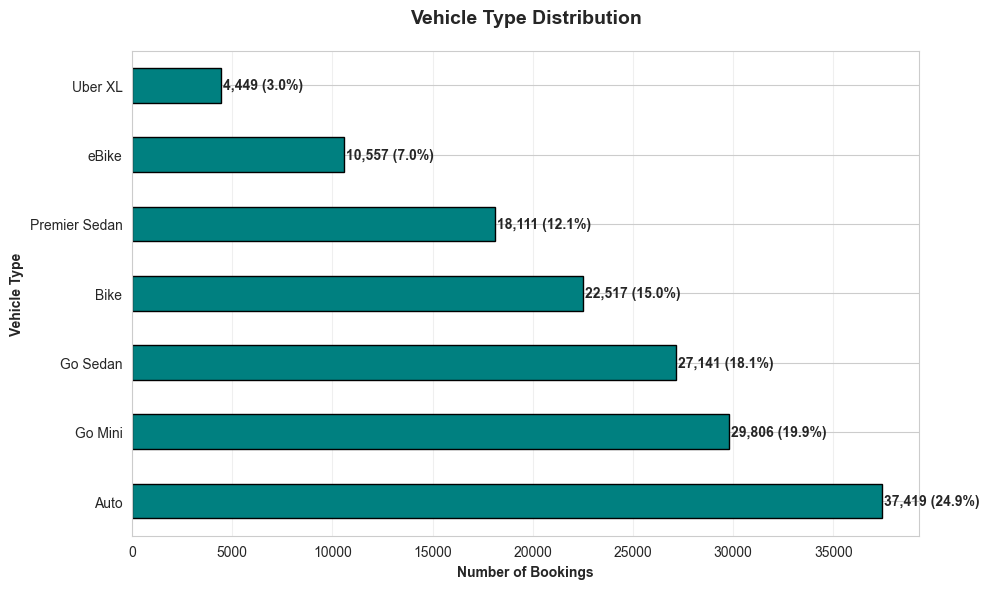

In [18]:
# Analyze Vehicle Type distribution
if 'Vehicle Type' in df.columns:
    print("\n" + "=" * 80)
    print("VEHICLE TYPE DISTRIBUTION")
    print("=" * 80)
    
    vehicle_counts = df['Vehicle Type'].value_counts()
    vehicle_pct = df['Vehicle Type'].value_counts(normalize=True) * 100
    
    vehicle_df = pd.DataFrame({
        'Count': vehicle_counts,
        'Percentage': vehicle_pct.round(2)
    })
    
    display(vehicle_df)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    vehicle_counts.plot(kind='barh', color='teal', edgecolor='black')
    plt.xlabel('Number of Bookings', fontweight='bold')
    plt.ylabel('Vehicle Type', fontweight='bold')
    plt.title('Vehicle Type Distribution', fontweight='bold', fontsize=14, pad=20)
    
    # Add value labels
    for i, v in enumerate(vehicle_counts.values):
        plt.text(v + 100, i, f'{v:,} ({vehicle_pct.iloc[i]:.1f}%)', 
                va='center', fontweight='bold')
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../visualizations/01_vehicle_type.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved: visualizations/01_vehicle_type.png")
    plt.show()


PAYMENT METHOD DISTRIBUTION


,Count,Percentage
Payment Method,,
UPI,45909,45.01
Cash,25367,24.87
Uber Wallet,12276,12.04
Credit Card,10209,10.01
Debit Card,8239,8.08



✓ Visualization saved: visualizations/01_payment_method.png


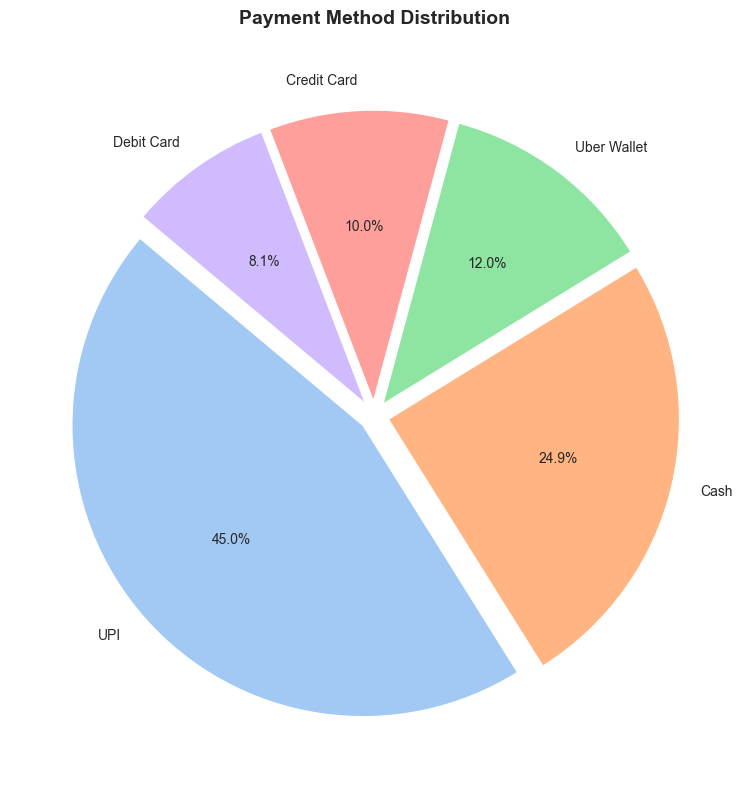

In [19]:
# Analyze Payment Method distribution
if 'Payment Method' in df.columns:
    print("\n" + "=" * 80)
    print("PAYMENT METHOD DISTRIBUTION")
    print("=" * 80)
    
    payment_counts = df['Payment Method'].value_counts()
    payment_pct = df['Payment Method'].value_counts(normalize=True) * 100
    
    payment_df = pd.DataFrame({
        'Count': payment_counts,
        'Percentage': payment_pct.round(2)
    })
    
    display(payment_df)
    
    # Visualize
    plt.figure(figsize=(8, 8))
    plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('pastel'), 
            explode=[0.05] * len(payment_counts))
    plt.title('Payment Method Distribution', fontweight='bold', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('../visualizations/01_payment_method.png', dpi=300, bbox_inches='tight')
    print("\n✓ Visualization saved: visualizations/01_payment_method.png")
    plt.show()

---
## 8. Outlier Detection
Identifying potential outliers in numerical features using IQR method.

In [20]:
# Detect outliers using IQR method
print("=" * 80)
print("OUTLIER DETECTION (IQR METHOD)")
print("=" * 80)

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': round(outlier_pct, 2),
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print("\nOutliers detected in numerical columns:\n")
display(outlier_df)

OUTLIER DETECTION (IQR METHOD)

Outliers detected in numerical columns:



,Column,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
7,Driver Ratings,5203,3.47,3.35,5.35
5,Booking Value,3435,2.29,-448.50,1371.50
8,Customer Rating,3257,2.17,3.30,5.70
0,Avg VTAT,0,0.00,-3.70,20.30
1,Avg CTAT,0,0.00,-1.20,59.60
2,Cancelled Rides by Customer,0,0.00,1.00,1.00
3,Cancelled Rides by Driver,0,0.00,1.00,1.00
4,Incomplete Rides,0,0.00,1.00,1.00
6,Ride Distance,0,0.00,-24.08,73.36


---
## 9. Key Findings Summary
Documenting initial observations and data quality issues for the cleaning phase.

In [21]:
# Generate comprehensive findings report
print("=" * 80)
print("INITIAL DATA EXPLORATION - KEY FINDINGS")
print("=" * 80)

findings = []

# Dataset overview
findings.append("📊 DATASET OVERVIEW")
findings.append(f"   • Total records: {df.shape[0]:,}")
findings.append(f"   • Total features: {df.shape[1]}")
findings.append(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
findings.append("\n📝 DATA TYPES")
findings.append(f"   • Numerical columns: {len(numerical_cols)}")
findings.append(f"   • Categorical columns: {len(categorical_cols)}")

# Missing values
missing_total = df.isnull().sum().sum()
findings.append("\n⚠️  MISSING VALUES")
if missing_total > 0:
    findings.append(f"   • Total missing values: {missing_total:,} ({(missing_total / (df.shape[0] * df.shape[1]) * 100):.2f}% of all data)")
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    findings.append(f"   • Columns affected: {len(cols_with_missing)}")
else:
    findings.append("   • ✓ No missing values detected")

# Duplicates
dup_count = df.duplicated().sum()
findings.append("\n🔄 DUPLICATE RECORDS")
if dup_count > 0:
    findings.append(f"   • Duplicate rows found: {dup_count:,} ({(dup_count/len(df)*100):.2f}%)")
else:
    findings.append("   • ✓ No duplicate rows detected")

# Revenue insights
if 'Booking Value' in df.columns:
    revenue = df['Booking Value'].dropna()
    findings.append("\n💰 REVENUE INSIGHTS")
    findings.append(f"   • Total revenue: ₹{revenue.sum():,.2f}")
    findings.append(f"   • Average booking value: ₹{revenue.mean():,.2f}")
    findings.append(f"   • Median booking value: ₹{revenue.median():,.2f}")
    findings.append(f"   • Revenue range: ₹{revenue.min():,.2f} to ₹{revenue.max():,.2f}")

# Booking status
if 'Booking Status' in df.columns:
    findings.append("\n📋 BOOKING STATUS")
    status_counts = df['Booking Status'].value_counts()
    for status, count in status_counts.items():
        findings.append(f"   • {status}: {count:,} ({count/len(df)*100:.1f}%)")

# Outliers
total_outliers = outlier_df['Outlier_Count'].sum()
findings.append("\n🎯 OUTLIERS DETECTED")
findings.append(f"   • Total outlier records across all numerical columns: {total_outliers:,}")
top_outlier_cols = outlier_df.head(3)
findings.append("   • Top columns with outliers:")
for _, row in top_outlier_cols.iterrows():
    findings.append(f"     - {row['Column']}: {row['Outlier_Count']:,} ({row['Outlier_Percentage']:.2f}%)")

# Print all findings
for finding in findings:
    print(finding)

print("\n" + "=" * 80)

INITIAL DATA EXPLORATION - KEY FINDINGS
📊 DATASET OVERVIEW
   • Total records: 150,000
   • Total features: 21
   • Memory usage: 100.71 MB

📝 DATA TYPES
   • Numerical columns: 9
   • Categorical columns: 12

⚠️  MISSING VALUES
   • Total missing values: 1,123,500 (35.67% of all data)
   • Columns affected: 13

🔄 DUPLICATE RECORDS
   • ✓ No duplicate rows detected

💰 REVENUE INSIGHTS
   • Total revenue: ₹51,846,183.00
   • Average booking value: ₹508.30
   • Median booking value: ₹414.00
   • Revenue range: ₹50.00 to ₹4,277.00

📋 BOOKING STATUS
   • Completed: 93,000 (62.0%)
   • Cancelled by Driver: 27,000 (18.0%)
   • No Driver Found: 10,500 (7.0%)
   • Cancelled by Customer: 10,500 (7.0%)
   • Incomplete: 9,000 (6.0%)

🎯 OUTLIERS DETECTED
   • Total outlier records across all numerical columns: 11,895
   • Top columns with outliers:
     - Driver Ratings: 5,203 (3.47%)
     - Booking Value: 3,435 (2.29%)
     - Customer Rating: 3,257 (2.17%)



---
## 10. Next Steps

Based on this initial exploration, the following actions are recommended for the **Data Cleaning** phase:

### Data Quality Issues to Address:
1. **Missing Values**: Develop strategy for handling missing data in specific columns
2. **Date/Time Parsing**: Convert Date and Time columns to proper datetime format
3. **Outliers**: Investigate and decide treatment strategy for outliers in revenue and other metrics
4. **Duplicates**: Remove or investigate duplicate records if any found
5. **Data Types**: Ensure all columns have appropriate data types for analysis

### Columns Requiring Attention:
- Date and Time columns need datetime conversion
- Cancellation reason columns (investigate text patterns)
- Rating columns (check for invalid values)
- Revenue column (handle zeros/negatives if any)

### Features for Engineering:
- Temporal features (hour, day of week, month, is_weekend, is_peak_hour)
- Distance-based features
- Cancellation rate features
- Customer/Driver behavior aggregates
- Location-based features

**Proceed to:** `02_data_cleaning.ipynb`

In [22]:
# Save column summary for reference
column_summary.to_csv('../data/processed/column_summary.csv', index=False)
print("✓ Column summary saved: data/processed/column_summary.csv")

# Save statistical summary
numerical_summary.to_csv('../data/processed/numerical_summary.csv')
print("✓ Numerical summary saved: data/processed/numerical_summary.csv")

# Save outlier report
outlier_df.to_csv('../data/processed/outlier_report.csv', index=False)
print("✓ Outlier report saved: data/processed/outlier_report.csv")

print("\n✓ All initial exploration outputs saved successfully!")
print("\n" + "=" * 80)
print("NOTEBOOK 01 COMPLETED - Ready for Data Cleaning Phase")
print("=" * 80)

✓ Column summary saved: data/processed/column_summary.csv
✓ Numerical summary saved: data/processed/numerical_summary.csv
✓ Outlier report saved: data/processed/outlier_report.csv

✓ All initial exploration outputs saved successfully!

NOTEBOOK 01 COMPLETED - Ready for Data Cleaning Phase
